#**Softmax Regression**

####**Môn học:** Thị giác máy tính nâng cao
####**Giảng viên:** TS. Nguyễn Vinh Tiệp
####**Lớp:** CS331.M21
####**Thành viên nhóm:**
| MSSV       | Họ và tên          |
|------------|--------------------|
| 19521388   | Hoàng Tiến Dũng    |
| 19522410   | Nguyễn Thành Trọng |


In [1]:
# Cài đặt thư viện cần thiết
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from pandas import DataFrame
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

In [2]:
# tải bộ data mnist_784
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
# Chia bộ dữ liệu với 60,000 mẫu training và 10,000 mẫu testing với trường hợp Data Standardization
shuffle_index = np.random.permutation(70000)
X = mnist["data"].iloc[shuffle_index]
X_T = X.values.T
print(X.shape)
X_scaled = StandardScaler().fit_transform(X_T)
Y = mnist["target"].iloc[shuffle_index]
x_train_sc, x_test_sc, y_train_sc, y_test_sc = X_scaled[:,:60000], X_scaled[:,60000:], Y[:60000].astype(int), Y[60000:].astype(int)

(70000, 784)


In [23]:
# Chia bộ dữ liệu với 60,000 mẫu training và 10,000 mẫu testing với trường hợp Data Normalization
shuffle_index = np.random.permutation(70000)
X = mnist["data"].iloc[shuffle_index]/255
XT_ = X.values.T
print(X.shape)
Y = mnist["target"].iloc[shuffle_index]
x_train, x_test, y_train, y_test = X_T[:,:60000], X_T[:,60000:], Y[:60000].astype(int), Y[60000:].astype(int)

(70000, 784)


In [21]:
# One-hot encode cho y_train
y_train_hot = np.eye(10)[y_train]
y_train_hot = y_train_hot.T

In [22]:
# One-hot encode cho y_train_sc
y_train_sc_hot = np.eye(10)[y_train_sc]
y_train_sc_hot = y_train_sc_hot.T

In [7]:
class Softmax():
  """Implement Softmax Regression."""
  def __init__(self):
    pass

  def softmax(self, z):
    """Cài đặt hàm softmax."""
    s = np.sum(np.exp(z), axis=0, keepdims=True) # Tính tổng của các lũy thừa cơ số e
    return np.exp(z)/s # Lấy lũy thừa cơ số e của mỗi phần tử chia cho tổng trên
  
  def cost_function(self, X, y, theta):
    """Cài đặt hàm mất mát."""
    m = len(X[0])
    y_pred = self.softmax(np.dot(theta.T, X)) # Tính y_pred 
    cost = -1.0 * np.mean(np.sum(y * np.log(y_pred), axis = 0)) # Tính trung bình của cross entropy mỗi record
    return cost
  
  def batch_gradient_descent(self, X, y, theta, iters, alpha):
    """Cập nhật theta bằng batch gradient descent."""
    m = len(X[0])
    costs = [] # Mảng costs dùng để lưu cost sau mỗi iter
    for i in range(iters):
      y_pred = self.softmax(np.dot(theta.T,X)) # Tính y_pred
      dtheta = np.dot(X, (y_pred - y).T) # Tính đạo hàm của theta theo hàm loss
      theta -= alpha * 1.0 / m * dtheta # Cập nhật theta
      cost = self.cost_function(X=X, y=y, theta=theta) # Tính và lưu cost sau mỗi iter
      costs.append(cost)
      if (i+1) % 10 == 0 or (i+1) == iters: # Cứ sau 10 iter hoặc iter cuối thì in cost ra
        print(f"Iteration: {i+1} --- cost: {cost}")
    return theta, costs

  def fit(self, X, y, iters = 15, learning_rate=0.01):
    """Thực hiện huấn luyện mô hình."""
    m = len(X[0])
    n = len(X) # shape X = n x m
    c = len(y) # shape y = c x m
    self.X = X
    self.y = y
    self.iters = iters
    self.X_train = np.append(np.ones((1, m)), X, axis=0) # Thêm hệ số bias cho X_train, shape X_train = (n+1) x m
    self.y_train = self.y # shape y_train = c x m
    self.theta = np.zeros((n + 1, c)) # Tạo theta gồm các phần tử bằng 0 có shape = (n+1) x c
    # Cập nhật và trả về theta, costs
    self.theta, self.costs = self.batch_gradient_descent(self.X_train, self.y_train, self.theta, iters=iters, alpha=learning_rate)
    return self.theta, self.costs

  def visual_cost(self):
    """Visual loss qua từng iter với matplotlib."""
    fig, ax = plt.subplots()
    ax.plot(range(self.iters), self.costs)
    ax.set(title='Costs', xlabel= 'Iteration', ylabel='Cost')
    plt.show()

  def predict(self, X_pred, one_hot_decode=False):
    """Dự đoán với mô hình đã được huấn luyện."""
    m = len(X_pred[0])
    n = len(self.X)
    if n != len(X_pred): # Kiểm tra chiều của X_pred có cùng chiều với X không
      print("Check your test data!")
      return
    X_pred_add_one = np.append(np.ones((1, m)), X_pred, axis=0) # Thêm hệ số bias của X_pred
    y_pred_hot = np.dot(self.theta.T, X_pred_add_one) # Dự đoán
    if one_hot_decode==True: # One-hot decode nếu muốn
      y_pred = np.argmax(y_pred_hot, axis=0)
      return y_pred
    return y_pred_hot

In [8]:
# Khởi tạo mô hình Softmax
sm = Softmax()

In [9]:
# Huấn luyện mô hình với iters=1000, learning_rate=0.01 với trường hợp Data Normalization
t0 = time.time()
theta, costs = sm.fit(x_train, y_train_hot, 1000, 0.01)
print("Time: ", time.time() - t0)

Iteration: 10 --- cost: 2.198378732933156
Iteration: 20 --- cost: 2.1026302289255394
Iteration: 30 --- cost: 2.0140649683913336
Iteration: 40 --- cost: 1.9319558863638904
Iteration: 50 --- cost: 1.8557914613547644
Iteration: 60 --- cost: 1.7851443366288926
Iteration: 70 --- cost: 1.7196222399472736
Iteration: 80 --- cost: 1.658851925034588
Iteration: 90 --- cost: 1.602475627473474
Iteration: 100 --- cost: 1.5501517488309149
Iteration: 110 --- cost: 1.501556554370229
Iteration: 120 --- cost: 1.4563857061068404
Iteration: 130 --- cost: 1.4143552541845454
Iteration: 140 --- cost: 1.3752020249612626
Iteration: 150 --- cost: 1.338683468292222
Iteration: 160 --- cost: 1.3045770710003186
Iteration: 170 --- cost: 1.2726794518183135
Iteration: 180 --- cost: 1.242805244050519
Iteration: 190 --- cost: 1.214785855494914
Iteration: 200 --- cost: 1.188468176274387
Iteration: 210 --- cost: 1.163713287226184
Iteration: 220 --- cost: 1.1403952059103855
Iteration: 230 --- cost: 1.1183996946450117
Iterat

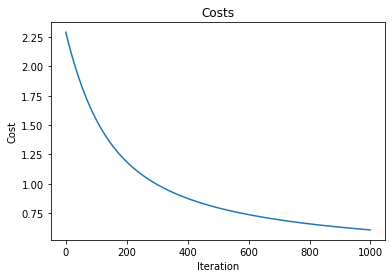

In [10]:
# Visual cost của mô hình sau mỗi iter
sm.visual_cost()

In [11]:
# Predict x_test
y_pred = sm.predict(x_test, one_hot_decode=True)

In [12]:
# Tính accuracy
accuracy_score(y_test, y_pred)

0.8605

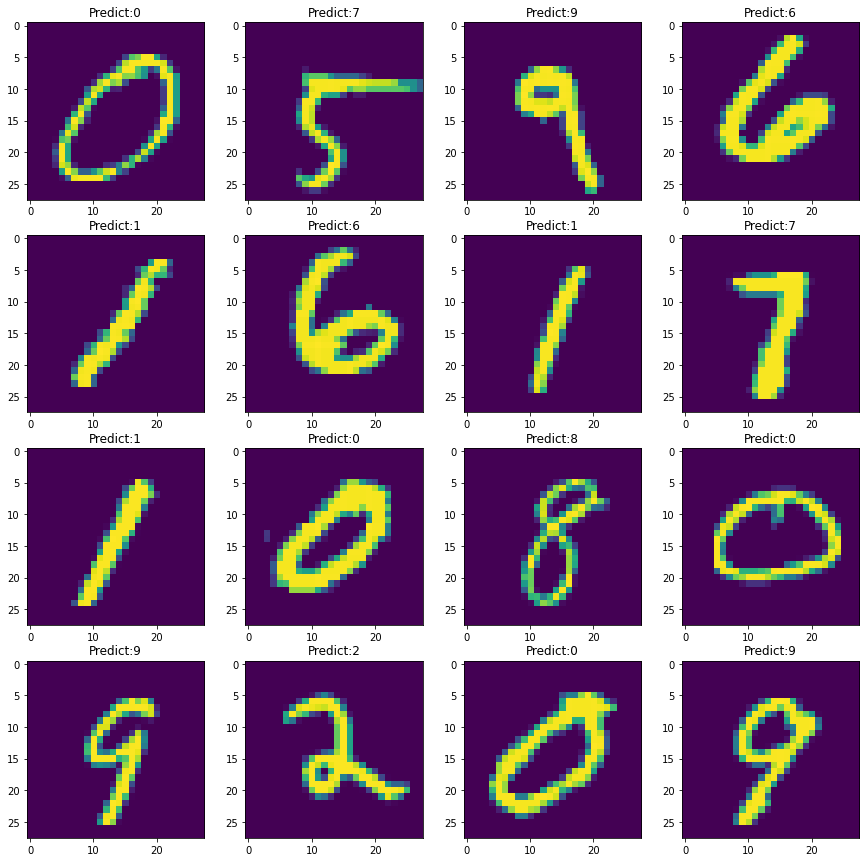

In [13]:
# Visual kết quả dự đoán
ax = []
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 4
for i in range(columns*rows):
    index = np.random.randint(10000)
    img = x_test.T[index].reshape(28,28)
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Predict:"+str(y_pred[index]))  # set title
    plt.imshow(img)
plt.show() 

In [24]:
# Huấn luyện mô hình với iters=1000, learning_rate=0.01 với Data Standardization
t0 = time.time()
theta_sc, costs_sc = sm.fit(x_train_sc, y_train_sc_hot, 1000, 0.01)
print("Time: ", time.time() - t0)

Iteration: 10 --- cost: 1.4901397341606537
Iteration: 20 --- cost: 1.1279833274803068
Iteration: 30 --- cost: 0.9397342682629901
Iteration: 40 --- cost: 0.8263415422158861
Iteration: 50 --- cost: 0.7505723539379373
Iteration: 60 --- cost: 0.6961519142188343
Iteration: 70 --- cost: 0.6549889678781545
Iteration: 80 --- cost: 0.6226339562547045
Iteration: 90 --- cost: 0.5964406923744038
Iteration: 100 --- cost: 0.574735788551693
Iteration: 110 --- cost: 0.5564079310074179
Iteration: 120 --- cost: 0.5406891777053818
Iteration: 130 --- cost: 0.5270311807061838
Iteration: 140 --- cost: 0.5150314853965784
Iteration: 150 --- cost: 0.504387734026714
Iteration: 160 --- cost: 0.4948681579562983
Iteration: 170 --- cost: 0.4862919640500029
Iteration: 180 --- cost: 0.47851594102972744
Iteration: 190 --- cost: 0.4714250947198859
Iteration: 200 --- cost: 0.46492596238247547
Iteration: 210 --- cost: 0.4589417504284163
Iteration: 220 --- cost: 0.4534087390585073
Iteration: 230 --- cost: 0.44827358368824

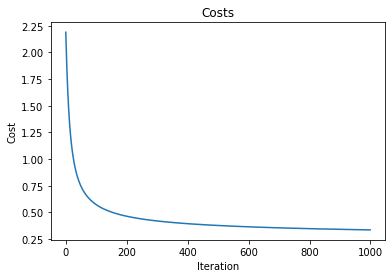

In [25]:
# Visual cost của mô hình sau mỗi iter
sm.visual_cost()

In [26]:
# Predict x_test
y_pred = sm.predict(x_test_sc, one_hot_decode=True)

In [27]:
# Tính accuracy
accuracy_score(y_test_sc, y_pred)

0.9052

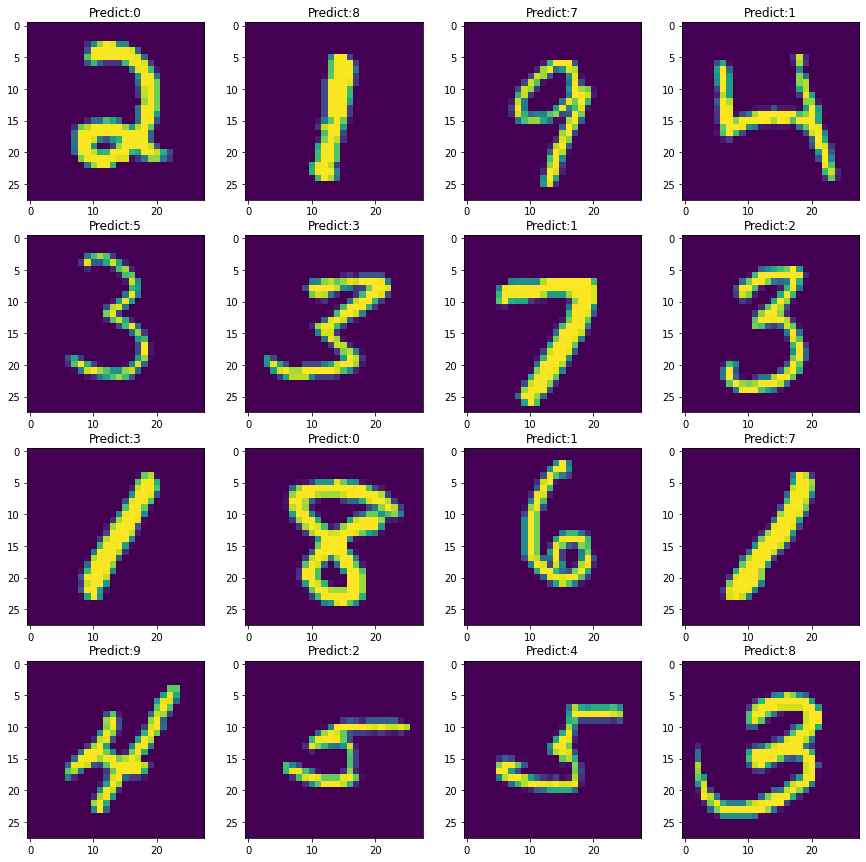

In [28]:
# Visual kết quả dự đoán
ax = []
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 4
for i in range(columns*rows):
    index = np.random.randint(10000)
    img = x_test.T[index].reshape(28,28)
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Predict:"+str(y_pred[index]))  # set title
    plt.imshow(img)
plt.show() 